Project Statement:
1. While searching for the dream house, the buyer looks at various factors, not just at
the height of the basement ceiling or the proximity to an east-west railroad.
2. Using the dataset, find the factors that influence price negotiations while buying a house.
3. There are 79 explanatory variables describing every aspect of residential homes inAmes, Iowa.

In [393]:
#import software
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### 1. Understand the dataset



In [394]:
#import data
df = pd.read_csv('/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course4_Applied Data Science with Python/Final Project/1669096535_feature_engineering_dataset/PEP1.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [395]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


a. ID the shape of the dataset


In [396]:
#identify the shape of the dataset
df.shape


(1460, 81)

b. ID the variables with null values

In [397]:
# Identify variables with null values
df.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

c. ID the variables with unique values

In [398]:
#Identify variables with unique values 
for i in df.columns:
    print (i , ":", df[i].unique())
    print (" _ "*40)
    print (" _ "*40)


Id : [   1    2    3 ... 1458 1459 1460]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47.

### 2. Generate a separate dataset for numerical and categorical variables


In [399]:
numeric_df= df.select_dtypes(include=[np.number])
numeric_df


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [400]:
categoric_df=df.select_dtypes(exclude=[np.number])
categoric_df


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [401]:
numericcol=numeric_df.columns.tolist()
categorycol=categoric_df.columns.tolist()
print ("Category :",categorycol)
print ("\n Numeric :",numericcol)


Category : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

 Numeric : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'Op

### 3. EDA of numerical variables
a. Missing Value treatment

In [448]:
# Missing Value Treatment of Numerical Values
numeric_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalf

In [452]:
numeric_df.isna().sum(axis=0)


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
Bedroom          0
Kitchen          0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## No Missing Values

In [409]:
#Identify the skewness of the data
numeric_df.skew().sort_values(ascending=False)
 

LotArea          15.608113
PoolArea         13.783823
3SsnPorch        10.854868
LowQualFinSF     10.020823
MiscVal           9.699989
Kitchen           4.822542
BsmtFinSF2        4.399358
BsmtHalfBath      4.107874
ScreenPorch       4.019111
EnclosedPorch     3.173250
MasVnrArea        2.706945
OpenPorchSF       2.403928
LotFrontage       2.251197
BsmtFinSF1        1.934077
SalePrice         1.933615
TotalBsmtSF       1.754916
GrLivArea         1.549961
WoodDeckSF        1.549793
MSSubClass        1.412907
1stFlrSF          1.363783
BsmtUnfSF         0.875774
OverallCond       0.846451
2ndFlrSF          0.807411
GarageArea        0.733894
TotRmsAbvGrd      0.723117
Fireplaces        0.643698
HalfBath          0.638178
BsmtFullBath      0.568804
OverallQual       0.287800
GarageCars        0.206017
MoSold            0.173039
YrSold            0.106730
Bedroom           0.074427
Id                0.018663
FullBath          0.015822
YearRemodAdd     -0.565757
YearBuilt        -0.618350
G

1. Normal skewness is between -0.5 and 0.5.
2. The data that are the most highly positively skewed are: 
    a. LotArea          15.608113
    b. PoolArea         13.783823
    c. 3SsnPorch        10.854868


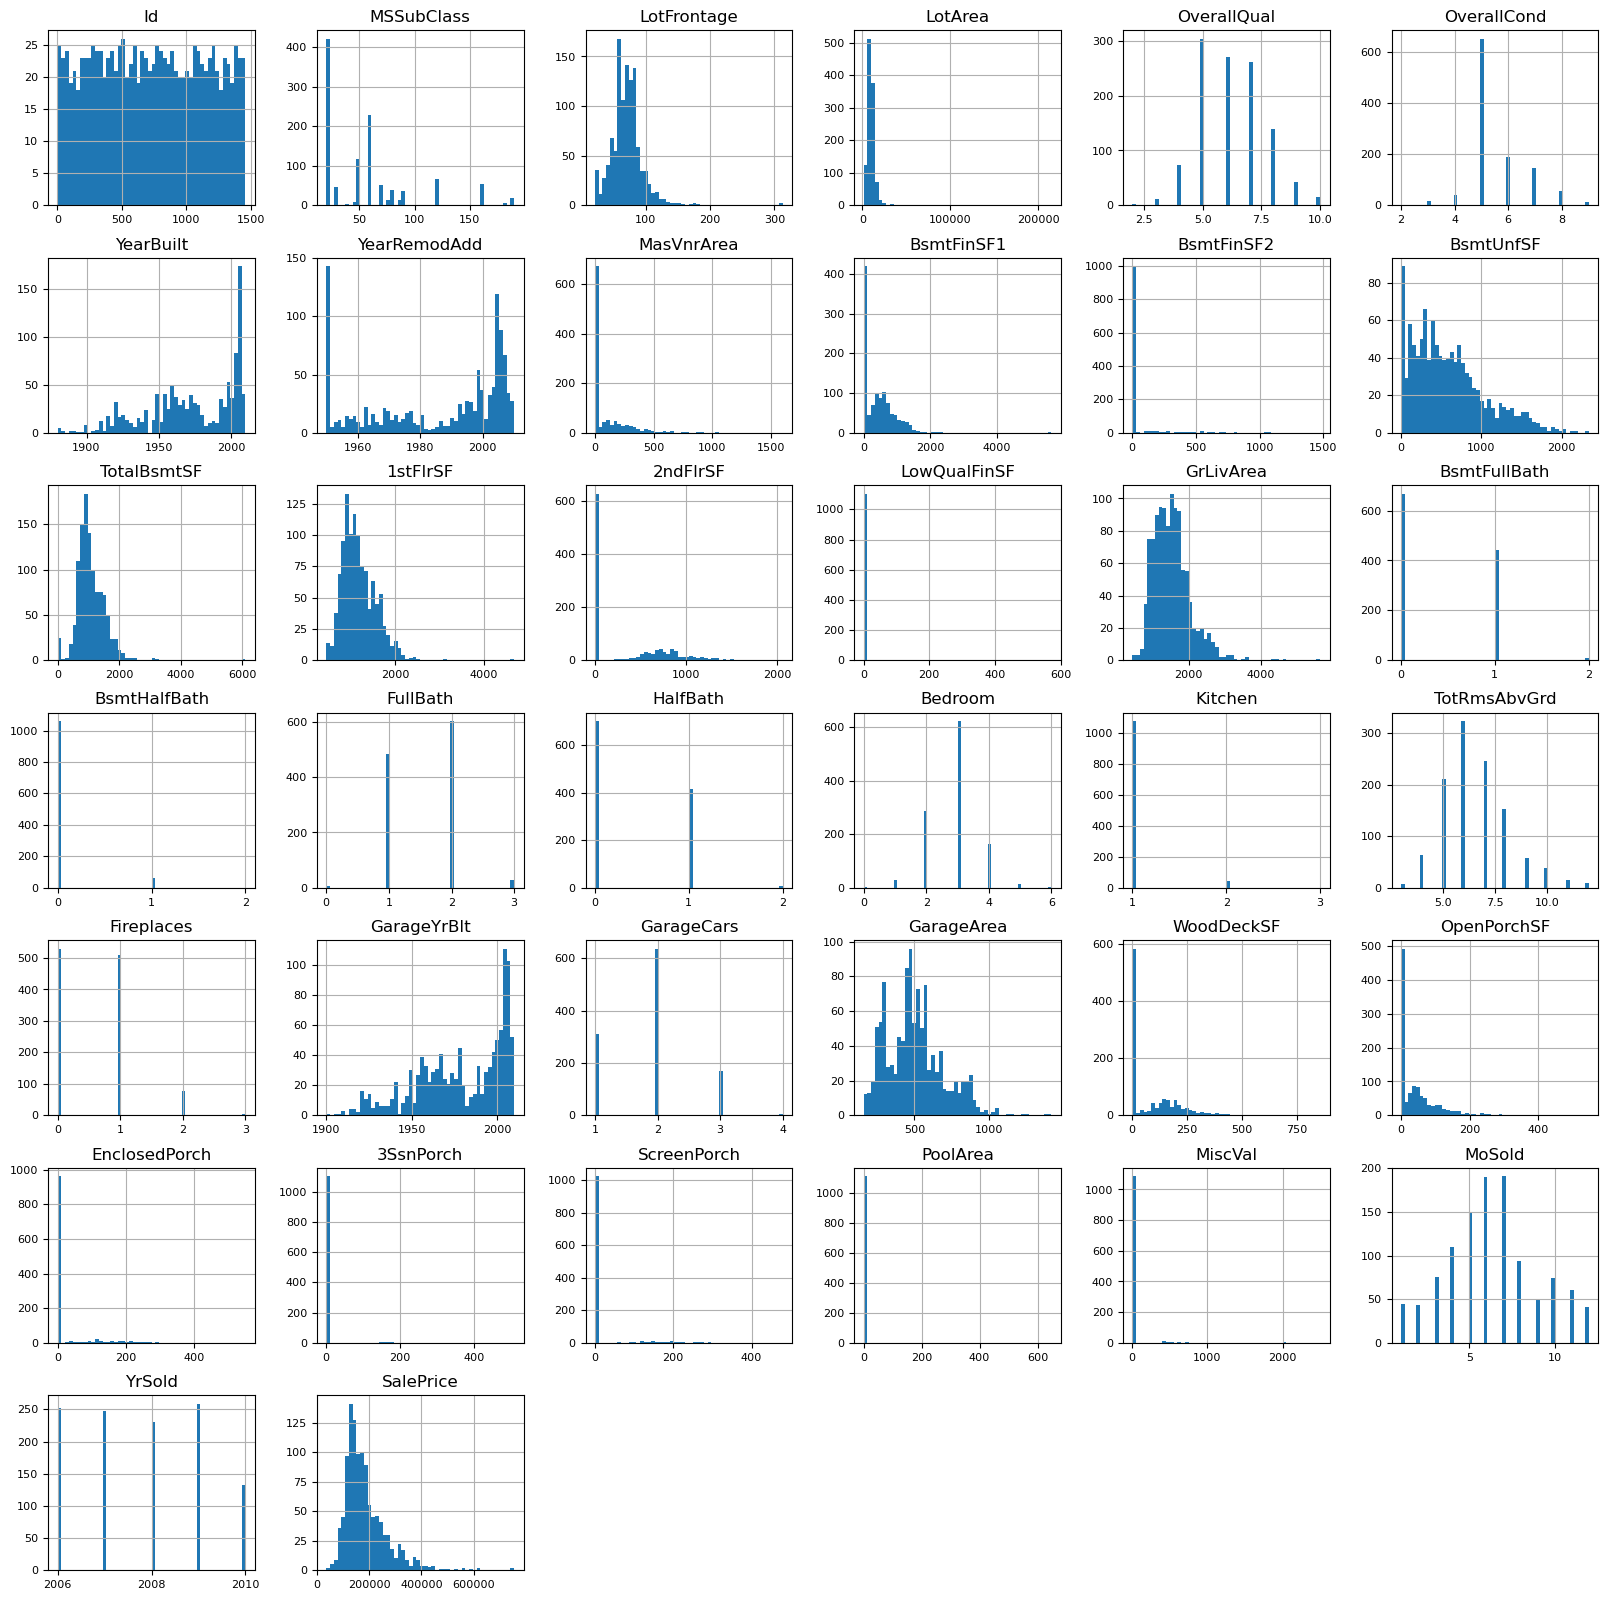

In [410]:
#identify the distribution of the data
numeric_df.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);


On the above graphs the following are skewed left:
1. LotArea
2. LotFrontage
3. MasVnrArea
4. BsmtFinSF1
5. BsmtFinSF2
6. TotalBsmtSF
7. 1stFlrSF
8. LowQualFinSF
9. GrLivArea
10. GarageArea
11. WoodDeckSF
12. OpenPorchSF
13. EnclosedPorch
14. 3SsnPorch
15. MiscVal
15. SalePrice

On the above graphs the following are skewed right:
1. GarageYrBuilt

Data needs to be normalized in EDA

c. Identify significant variables using a correlation matrix

<AxesSubplot:>

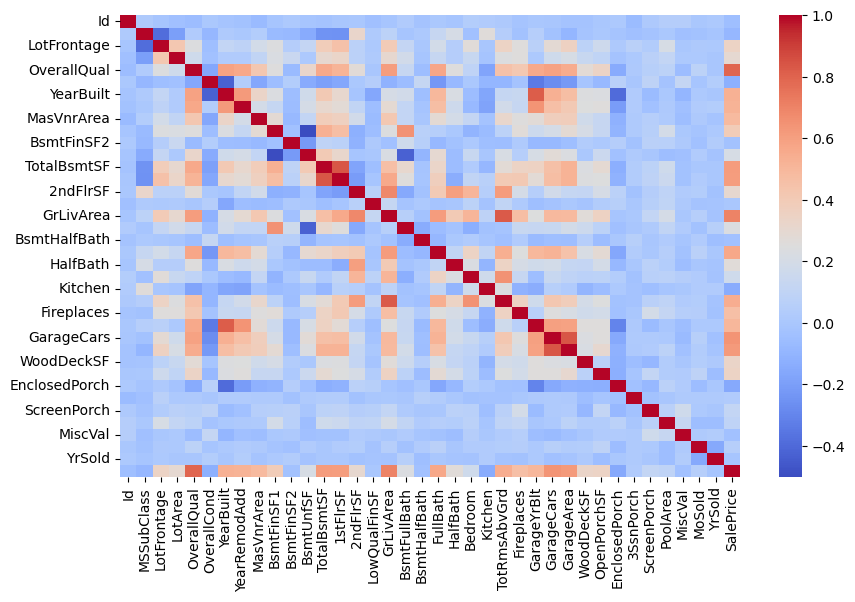

In [411]:
# Id significant variables using a correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')


Observations from above correlation matrix:

1. OverallQual and SalePrice are highly correlated
2. GrLivArea and TotRmsAbvGrd are highly correlated
3. GarageCars and GarageArea are highly correlated
4. TotalBsmtSF and 1stFlrSF are highly correlated
5. YearBuilt and GarageYrBuilt are highly correlated
    

In [412]:
# a lot of data correlates to SalePrice
# identify the top 10 variables
numeric_df.corr()['SalePrice'].sort_values(ascending=False).head(10)


SalePrice       1.000000
OverallQual     0.797881
GrLivArea       0.705154
GarageCars      0.647034
GarageArea      0.619330
TotalBsmtSF     0.615612
1stFlrSF        0.607969
FullBath        0.566627
TotRmsAbvGrd    0.547067
YearBuilt       0.525394
Name: SalePrice, dtype: float64

<AxesSubplot:>

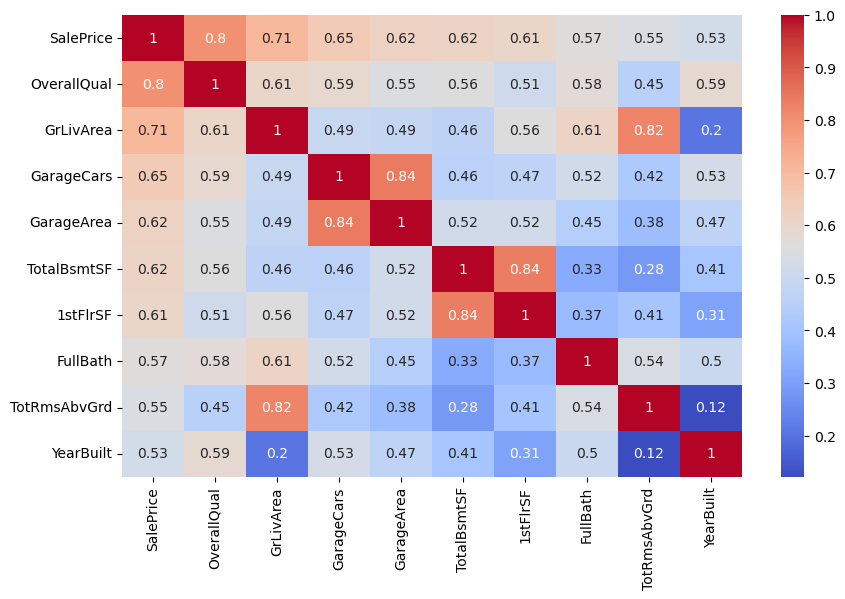

In [413]:
#SalePrice correlation matrix
k = 10 #top number of variables for heatmap
cols = numeric_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = numeric_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')



Observations from above correlation matrix:
1. SalePrice and OverallQual are highly correlated
2. SalePrice and GrLivArea are highly correlated
3. SalePrice and GarageCars are highly correlated
4. SalePrice and TotalBsmtSF are highly correlated  
5. SalePrice and FullBath are highly correlated

Which makes sense when you are looking for indicators for what a home is worth.

d. Pair plot for density

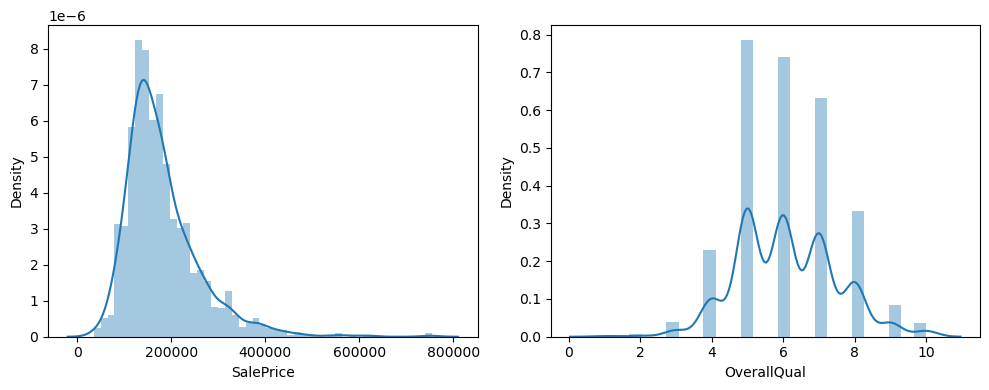

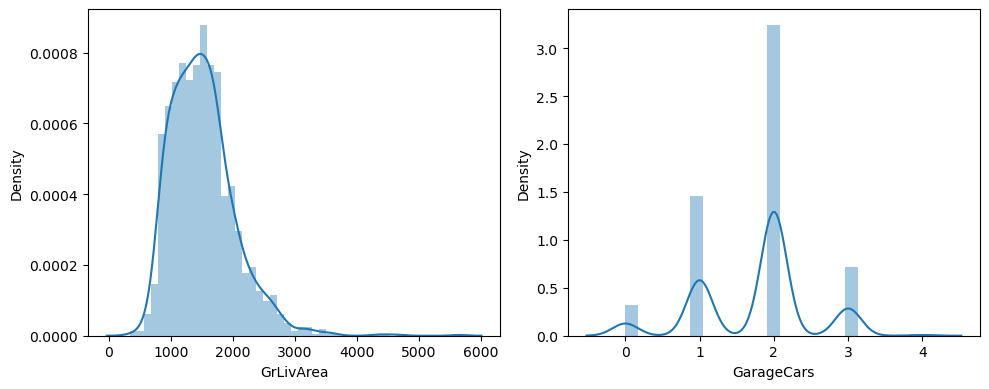

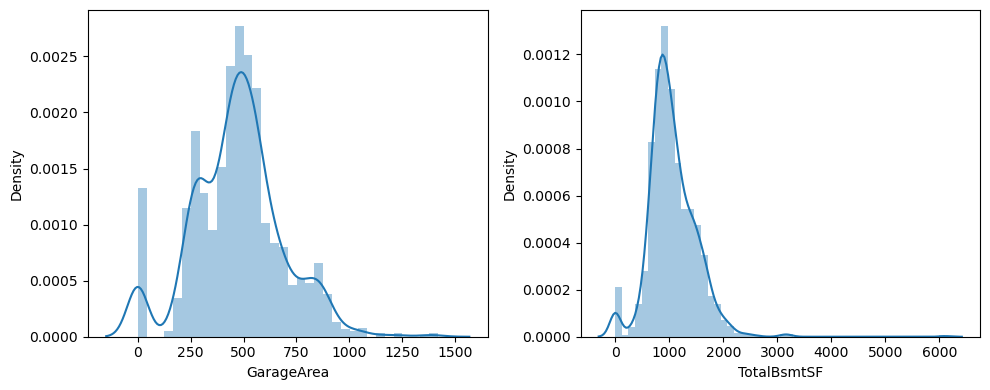

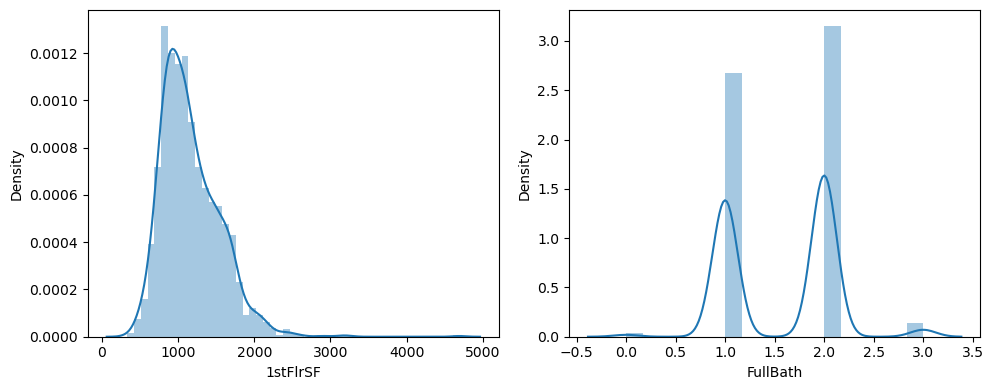

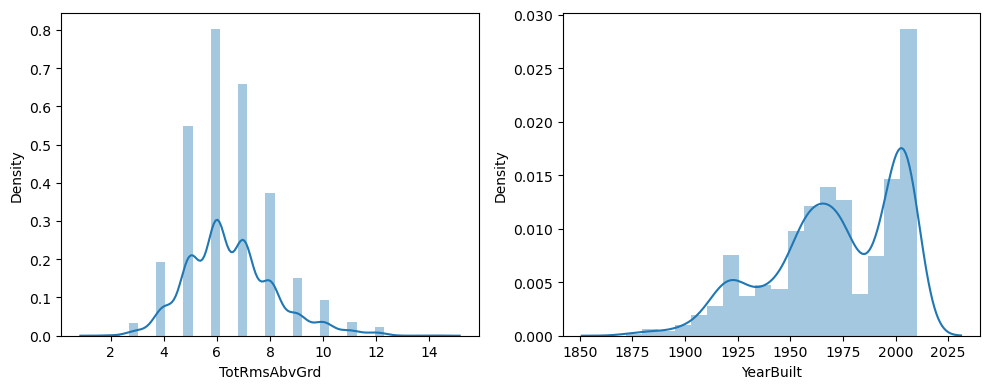

In [414]:
#Pair plot for kernel density estimation
cols = [ 
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    '1stFlrSF',
    'FullBath',
    'TotRmsAbvGrd',
    'YearBuilt']

for i in range(0,len(cols),2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(df[cols[i]], hist=True, kde=True)
    plt.subplot(122)
    sns.distplot(df[cols[i+1]], hist=True, kde=True)
    plt.tight_layout()
    plt.show()


On the above graphs the following are skewed left:
1. density vs SalePrice
2. density vs GrLivArea
3. density vs 1stFlrSF
4. density vs TotalBsmtSF

On the above graphs the following are skewed right:
1. density vs LotArea
2. density vs BsmtFinSF1
3. density vs GarageArea
4. density vs WoodDeckSF

Most data is left or right skewed so a transformation is required to make them linear.


### 4. EDA of categorical variables
a. Missing Value treatment

In [454]:
# Missing Value Treatment of Categorical Values 
categoric_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 197 to 1423
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       7 non-null      object
 1   Street         7 non-null      object
 2   Alley          0 non-null      object
 3   LotShape       7 non-null      object
 4   LandContour    7 non-null      object
 5   Utilities      7 non-null      object
 6   LotConfig      7 non-null      object
 7   LandSlope      7 non-null      object
 8   Neighborhood   7 non-null      object
 9   Condition1     7 non-null      object
 10  Condition2     7 non-null      object
 11  BldgType       7 non-null      object
 12  HouseStyle     7 non-null      object
 13  RoofStyle      7 non-null      object
 14  RoofMatl       7 non-null      object
 15  Exterior1st    7 non-null      object
 16  Exterior2nd    7 non-null      object
 17  MasVnrType     7 non-null      object
 18  ExterQual      7 non-null    

In [460]:
#in ascending order
categoric_df.isna().sum(axis=0).sort_values(ascending=False)


Alley            7
MiscFeature      6
Fence            1
MSZoning         0
Functional       0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
GarageType       0
FireplaceQu      0
BsmtCond         0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
SaleType         0
BsmtExposure     0
BsmtQual         0
Street           0
Foundation       0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
SaleCondition    0
dtype: int64

In [461]:
percentage_of_missing_values_MiscFeature = (categoric_df['MiscFeature'].isna().sum(axis=0)/categoric_df.shape[0])*100
percentage_of_missing_values_MiscFeature


85.71428571428571

In [462]:
percentage_of_missing_values_alley = (categoric_df['Alley'].isna().sum(axis=0)/categoric_df.shape[0])*100
percentage_of_missing_values_alley


100.0

In [463]:
# Drop columns "Alley" & "MiscFeature" because of the high numbers of rows with missing values
categoric_df.drop(['Alley','MiscFeature'], axis=1, inplace=True)


In [464]:
categoric_df.info()



<bound method DataFrame.info of      MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
197        RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
810        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1170       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1182       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
1298       RL   Pave      IR3         Bnk    AllPub    Corner       Gtl   
1386       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1423       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   

     Neighborhood Condition1 Condition2  ... FireplaceQu GarageType  \
197           mes     Artery       Norm  ...          Ex     Detchd   
810        NWAmes       Norm       Norm  ...          Fa     Attchd   
1170      Mitchel       Norm       Norm  ...          Po     Attchd   
1182      NoRidge       Norm       Norm  ...          TA     Attchd   
1298      Ed

In [445]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'Bedroom',
 'Kitchen',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [442]:
# PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCond, GarageQual, GarageFinish, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtQual, BsmtCond, MasVnrType, Electrical
# determine the percentage of missing values of each in a loop
for i in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'MasVnrType', 'Electrical']:
    print (i , ":", (categoric_df[i].isna().sum(axis=0)/categoric_df.shape[0])*100)


PoolQC : 0.0
MiscFeature : 85.71428571428571
Alley : 100.0
Fence : 14.285714285714285
FireplaceQu : 0.0
GarageType : 0.0
GarageCond : 0.0
GarageQual : 0.0
GarageFinish : 0.0
BsmtFinType2 : 0.0
BsmtExposure : 0.0
BsmtFinType1 : 0.0
BsmtQual : 0.0
BsmtCond : 0.0
MasVnrType : 0.0
Electrical : 0.0


In [443]:
categoric_df.shape


(7, 43)

In [444]:
#drop rows with missing values in 'PoolQC', 'MiscFeature', 'Alley', 'Fence'
categoric_df = categoric_df.dropna(subset=['PoolQC'], axis=0)
categoric_df.shape


(7, 43)

### 5. Combine all the significant categorical and numerical variables

### 6. Plot box plot for the new dataset to find the variables with outliers